<a href="https://colab.research.google.com/github/Nandhini-s25/sdcproject/blob/main/CNNimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 42ms/step - accuracy: 0.3604 - loss: 1.7268 - val_accuracy: 0.5306 - val_loss: 1.2995
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.5713 - loss: 1.2034 - val_accuracy: 0.5918 - val_loss: 1.1419
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.6348 - loss: 1.0372 - val_accuracy: 0.6594 - val_loss: 0.9645
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6661 - loss: 0.9529
Test accuracy: 0.6593999862670898
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


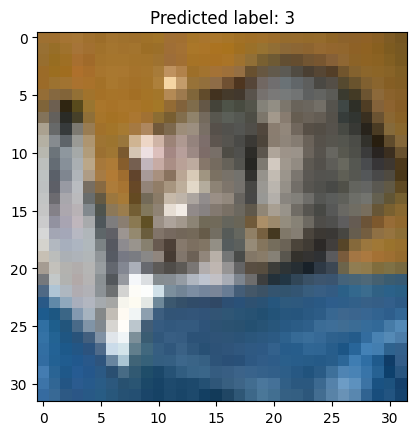

In [3]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=3, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Show a sample image and its predicted label
plt.imshow(test_images[0])
plt.title(f"Predicted label: {model.predict(test_images[:1]).argmax()}")
plt.show()